# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [75]:
# Import necessary libraries 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
df=pd.read_csv("/content/listings.csv.gz")

In [79]:
df.info()

print("\nNumber of Duplicate Row:")
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4332 non-null   int64  
 1   listing_url                                   4332 non-null   object 
 2   scrape_id                                     4332 non-null   int64  
 3   last_scraped                                  4332 non-null   object 
 4   source                                        4332 non-null   object 
 5   name                                          4332 non-null   object 
 6   description                                   4270 non-null   object 
 7   neighborhood_overview                         2895 non-null   object 
 8   picture_url                                   4332 non-null   object 
 9   host_id                                       4332 non-null   i

np.int64(0)

In [80]:
print("Describe Details: ")
df.describe()

Describe Details: 


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.332000e+03,4.332000e+03,4.332000e+03,4331.000000,4331.000000,0.0,4332.000000,4332.000000,4332.000000,3727.000000,...,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,4332.000000,4332.000000,4332.000000,4332.000000,3791.000000
mean,4.755877e+17,2.025062e+13,1.340934e+08,59.515124,97.238051,NaN,45.527349,-122.651929,3.604340,1.315938,...,4.859523,4.922894,4.925421,4.859691,4.803208,5.549400,4.887812,0.469067,0.006002,2.120301
std,5.428996e+17,8.985412e-01,1.796599e+08,374.486951,629.212521,NaN,0.032991,0.046709,2.178898,0.782462,...,0.256592,0.223776,0.208158,0.232890,0.270694,14.049936,13.972740,1.552205,0.098293,2.175351
min,3.767600e+04,2.025062e+13,1.618000e+03,1.000000,1.000000,NaN,45.433402,-122.832860,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.344871e+07,2.025062e+13,9.008868e+06,1.000000,1.000000,NaN,45.506457,-122.682830,2.000000,1.000000,...,4.830000,4.930000,4.930000,4.830000,4.760000,1.000000,1.000000,0.000000,0.000000,0.420000
50%,5.152693e+07,2.025062e+13,4.432271e+07,2.000000,2.000000,NaN,45.526167,-122.653055,3.000000,1.000000,...,4.930000,4.970000,4.980000,4.920000,4.860000,1.000000,1.000000,0.000000,0.000000,1.480000
75%,1.016364e+18,2.025062e+13,1.886341e+08,5.000000,7.000000,NaN,45.553830,-122.624583,4.000000,1.000000,...,4.990000,5.000000,5.000000,4.980000,4.930000,4.000000,2.000000,0.000000,0.000000,3.215000
max,1.442653e+18,2.025062e+13,6.950186e+08,4887.000000,6397.000000,NaN,45.615960,-122.484131,16.000000,18.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,93.000000,12.000000,2.000000,39.160000


In [100]:
df['price']

,price
0,125.0
1,140.0
2,383.0
3,76.0
4,54.0
...,...
4327,137.0
4328,275.0
4329,40000.0
4330,179.0


## 2. Explore Missing Values

Business framing:  

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:

- Count missing values in each column
- Visualize missingness if helpful (e.g., heatmap, barplot)
- Flag columns that might not be usable due to missing data

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



In [81]:
# Add code here 🔧

print(" Missing values per column:\n", df.isnull().sum().sort_values(ascending=False))
print("\n")
print(" Top 10 Missing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(10))


 Missing values per column:
 neighbourhood_group_cleansed                    4332
calendar_updated                                4332
neighborhood_overview                           1437
neighbourhood                                   1437
host_about                                      1432
                                                ... 
instant_bookable                                   0
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
Length: 79, dtype: int64


 Top 10 Missing values per column:
 neighbourhood_group_cleansed    4332
calendar_updated                4332
neighborhood_overview           1437
neighbourhood                   1437
host_about                      1432
license                         1402
host_response_time               660
host_response_rate               660
price                        

### ✍️ Your Response: 🔧
1. neighbourhood_group_cleansed, calendar_updated       and neighborhood_overview were the top columns with missing values.


2. Price has over 634 values missing, price is needed for all airbnb listings. This could cause an issue with pricing models. Neighbourhood has a high missing values, would be good to have to determine market segmentation. Host_response_time and host_response_rate are also important to airbnb managers to ensure airbnb listings aren't scams.  

3. Neighbourhood_cleansed, calendar_updated, host_about, and neighborhood_overview have high counts of missing data. These columns would be good to be removed since no modeling could be utilized from this.


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In your markdown:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [82]:
# Add code here 🔧

df.drop(['neighbourhood_group_cleansed', 'calendar_updated', 'host_about', 'neighborhood_overview'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4332 non-null   int64  
 1   listing_url                                   4332 non-null   object 
 2   scrape_id                                     4332 non-null   int64  
 3   last_scraped                                  4332 non-null   object 
 4   source                                        4332 non-null   object 
 5   name                                          4332 non-null   object 
 6   description                                   4270 non-null   object 
 7   picture_url                                   4332 non-null   object 
 8   host_id                                       4332 non-null   int64  
 9   host_url                                      4332 non-null   o

In [87]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,37676,https://www.airbnb.com/rooms/37676,20250617033039,2025-06-17,city scrape,Mt. Hood View in the Pearl District,"This rare and relaxing 1,000 SF loft is locate...",https://a0.muscache.com/pictures/212298/16fb6b...,162158,https://www.airbnb.com/users/show/162158,...,4.79,4.95,4.68,NaN,f,1,1,0,0,0.73
1,61893,https://www.airbnb.com/rooms/61893,20250617033039,2025-06-17,city scrape,Perfect Portland Place,Amazing for a long stay in<br />Portland's per...,https://a0.muscache.com/pictures/miso/Hosting-...,300391,https://www.airbnb.com/users/show/300391,...,5.00,5.00,4.92,NaN,f,1,1,0,0,0.24
2,67036,https://www.airbnb.com/rooms/67036,20250617033039,2025-06-17,city scrape,Historic Home Located in Central City,"Welcome to Multnomah House, a classic Portland...",https://a0.muscache.com/pictures/miso/Hosting-...,329777,https://www.airbnb.com/users/show/329777,...,4.97,4.80,4.83,12-123170-000-00-LU,f,1,1,0,0,0.44
3,77522,https://www.airbnb.com/rooms/77522,20250617033039,2025-06-17,city scrape,Spacious Suite in Eastmoreland/SE. Hot Tub Dog...,Our private spacious suite is in a beautiful r...,https://a0.muscache.com/pictures/miso/Hosting-...,345461,https://www.airbnb.com/users/show/345461,...,4.95,4.98,4.86,14-227531-000-00-HO,f,1,1,0,0,0.85
4,93613,https://www.airbnb.com/rooms/93613,20250617033039,2025-06-17,city scrape,Sunny Queen Room in FUN Alberta Arts,Peaceful home in vibrant Alberta Arts neighbor...,https://a0.muscache.com/pictures/d8e34f6a-be4d...,501715,https://www.airbnb.com/users/show/501715,...,4.73,4.84,4.45,NaN,f,11,3,8,0,0.40


### ✍️ Your Response: 🔧
1.I dropped 'neighbourhood_group_cleansed', 'calendar_updated', 'host_about', and 'neighborhood_overview'. They all high missing values.

2. These columns had high counts of missing data. I didn't find that these columns provided any value to any modeling whether its a predicitve or prescriptive anaysis.  neigbourhood_group_cleansed already had another column that was fairly similar to it and had complete data. Host_about isn't necessarily needed for any modeling (there could be instances were would could pull specific words that a host puts on their about to get a feel for their listing aesthetic)

3. I believe they would have just caused confusion to managers. They didn't provide any sort of value for modeling.



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your markdown:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [159]:
#updating missing price values with median price based on neighborhood and bedrooms they have.
df['price'] = (df['price'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float))
df['price'] = df.groupby(['neighbourhood_cleansed', 'bedrooms'])['price'].transform(lambda x: x.fillna(x.median()))
#Fill in 132 items that didn't get updated with median price by neighbourhood and bedroom.
df['price']=df['price'].fillna(df['price'].median())

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4332 non-null   int64  
 1   listing_url                                   4332 non-null   object 
 2   scrape_id                                     4332 non-null   int64  
 3   last_scraped                                  4332 non-null   object 
 4   source                                        4332 non-null   object 
 5   name                                          4332 non-null   object 
 6   description                                   4270 non-null   object 
 7   picture_url                                   4332 non-null   object 
 8   host_id                                       4332 non-null   int64  
 9   host_url                                      4332 non-null   o

In [160]:
# Flag missing values in 'review_scores_rating' before
df['review_scores_rating_missing'] = df['review_scores_rating'].isnull()
display(df[['review_scores_rating', 'review_scores_rating_filled', 'review_scores_rating_missing']].head(40))


,review_scores_rating,review_scores_rating_filled,review_scores_rating_missing
0,4.89,4.89,False
1,5.00,5.00,False
2,4.95,4.95,False
3,4.84,4.84,False
4,4.51,4.51,False
5,4.93,4.93,False
6,4.41,4.41,False
7,4.85,4.85,False
8,4.39,4.39,False
9,4.84,4.84,False


### ✍️ Your Response: 🔧
1. 1st column value -  'price' that had a missing value with the median price based on neighborhood and bedrooms they are grouped by. 2nd column value - 'review_scores_rating' by creating a flag for the missing values 'review_scores_rating_missing'.

2. 'price' was filled with median price of the grouped neigbourhood and bedrooms value.
'review_scores_rating' values that had a missing value were flagged with 'review_scores_rating_missing'

3.  The risk of using median price of the all values could cause the variation to be skewed since there will be instances of high price values. I choose to look at the neighbourhood cleansed and bedroom of each value, and used the median price of those together and filled in missing data. I did this to minimize the risk of having high variation if I had used the overall median home price of all values. However, I also update 132 price values that had a blank neighborhood value with the overall median price since it only affected 3% of data. To ensure the data integrity of the score rating (since its soley based on the consumers rating), I felt that flagging was the best solution.


## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In your markdown:
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


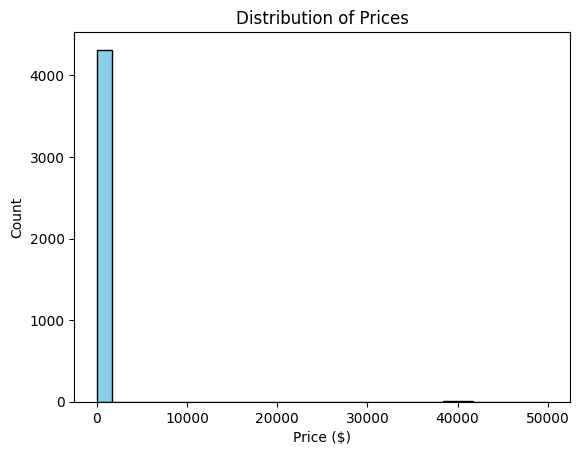

In [165]:
# Clean or adjust your dataset 🔧
df['price'] = (df['price'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float))
df['price'].dtype
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

In [171]:
df['price'].sort_values(ascending=True)

,price
2243,27.0
2190,29.0
738,29.0
1949,30.0
900,30.0
...,...
4227,40034.0
4233,40067.0
4234,40067.0
3439,50000.0


### ✍️ Your Response: 🔧
1. 'Price' had the dtype of object and I converted to a float value to allow for numeric calculations since the object dtype with $ would not allow that to be done.

2. I removed the non numeric characters like , and $. I then changed the data type to be a float.

3. It will make it easier to create charts with a float value rather than an object.  It also allows me to make any predictive modeling since it can now be calculated.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for exact duplicate rows
- Also check for duplicate IDs if a unique ID column exists
- Remove duplicates if found and explain your reasoning

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [173]:
# Add code here 🔧

print("\nNumber of Exact Duplicate Row:")
df.duplicated().sum()


Number of Exact Duplicate Row:


np.int64(0)

In [174]:
duplicate_ids = df['id'].duplicated().sum()
print(f"Duplicate listing IDs: {duplicate_ids}")

Duplicate listing IDs: 0


### ✍️ Your Response: 🔧 🔧
1.  No, there were no duplicates.

2. Didnt need to remove duplicates.

3. I would believe if there duplicates on Airbnb this could distort an analysis but also show that those listings could be a scam.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Make sure your cleaned DataFrame is named appropriately
# For example, if your cleaned dataset is stored in a DataFrame called 'df_cleaned':

# Export the cleaned DataFrame to a CSV file
df_cleaned.to_csv("cleaned_airbnb_data.csv", index=False)

# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually)

```





In [175]:
# export csv here 🔧

df.to_csv("cleaned_airbnb_data.csv", index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. __  Section 4 was a bit tricky because I didn't want to destory the integrity of the data but also knew that I needed to fill missing values. It was also a little tricky writing the code for the fill in of missing values for price and had to ask gemini to provide some assistance.
2. __  I dropped data that had very high numbers of missing data (these columns were all full of missing data). I fixed price data type since object would not be able to be used in chart creation.
3. __  Pricing analyst will be able to create a predicitive model for nightly stays pricing. Hosts would also be able to provide an accurate pricing for the bedroom, location and current market.  
4. __  Look at extreme outliers, however I know that I'll be able to manipulate that in data visualization. Additionally, look at the review_scores_value to understand the difference with review_scores_rating.
5. __  I wanted to work on creating predictive modeling and provide business insights. On this assignment I was able focus on fixing pricing values help minimize the amount of manipulation I'll have to do when I create data visuals.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_06_VelazquezAshley.ipynb"